# En clase sesión 6

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df = pd.read_csv('/work/B2-Analisis-de-Datos-con-Python-2020-2021-Santander/Datasets/diabetes-clean.csv')

<AxesSubplot:xlabel='glucose', ylabel='Count'>

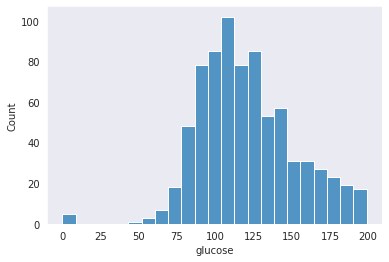

In [ ]:
sns.set_style('dark')
sns.histplot(df['glucose'])

<AxesSubplot:xlabel='glucose', ylabel='Count'>

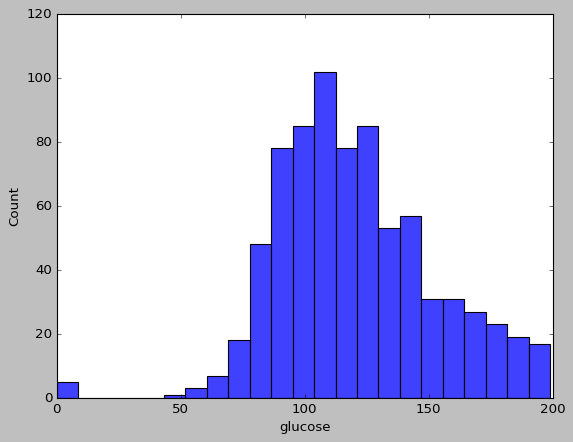

In [ ]:
##ggplot de R
plt.style.use('ggplot')
plt.style.use('default')
plt.style.use('classic')
sns.histplot(df['glucose'])


Hacer de manera temporal: uso de **with**

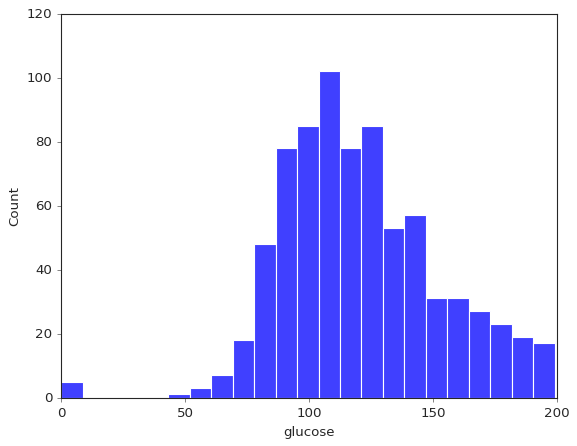

In [ ]:
# El estilo será aplicado solo para esta gráfica
with sns.axes_style('ticks'):
    sns.histplot(df['glucose'])

## Treemaps

Plotly (px): Libreria multiplataforma

In [ ]:
fig = px.treemap(
    names=['A','B','C','D','E','a','b','c','d','x','y','z'],
    parents=['','','','','','A','B','B','E','b','a','d']
)

fig.show()


In [ ]:
df = pd.read_csv('/work/B2-Analisis-de-Datos-con-Python-2020-2021-Santander/Datasets/athlete_olympic_events-clean.csv')
df.head()

,athlete_id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
3,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None
4,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None


In [ ]:
df_grouped = df.groupby('name')[['sex','sport']].max()

#Agrupación por nombre donde unicamente nos quedamos con
#las columnas sex y sport

In [ ]:
df_grouped.head()

,sex,sport
name,,
Th Anh,F,Fencing
Th Ngn Thng,F,Gymnastics
Tin Tun,M,Boxing
A Dijiang,M,Basketball
A Lamusi,M,Judo


In [ ]:
#df_grouped['count'] = 1


In [ ]:
#!pip install --upgrade plotly

In [ ]:
fig = px.treemap(
    df_grouped,
    path=['sport','sex']
    #values='count'
)

fig.show()

##### Repaso de seaborn

In [ ]:
# CSV de olimpiadas
df = pd.read_csv('/work/B2-Analisis-de-Datos-con-Python-2020-2021-Santander/Datasets/athlete_olympic_events-clean.csv')

In [ ]:
df_grouped = df.groupby('name')['height','weight','sex','team','sport'].max()
df_grouped

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,height,weight,sex,team,sport
name,,,,,
Th Anh,165.0,58.0,F,Vietnam,Fencing
Th Ngn Thng,147.0,47.0,F,Vietnam,Gymnastics
Tin Tun,173.0,63.0,M,Vietnam,Boxing
A Dijiang,180.0,80.0,M,China,Basketball
A Lamusi,170.0,60.0,M,China,Judo
...,...,...,...,...,...
zge Krdar emberci,183.0,70.0,F,Turkey,Volleyball
zlem Kaya,165.0,47.0,F,Turkey,Athletics
zman Graud,168.0,72.0,M,Turkey,Shooting


In [ ]:
china = df_grouped[df_grouped['team']=='China']
china

,height,weight,sex,team,sport
name,,,,,
A Dijiang,180.0,80.0,M,China,Basketball
A Lamusi,170.0,60.0,M,China,Judo
Abudoureheman,182.0,75.0,M,China,Boxing
Ai Linuer,160.0,62.0,M,China,Wrestling
Ai Yanhan,168.0,54.0,F,China,Swimming
...,...,...,...,...,...
Zou Sixin,178.0,76.0,M,China,Athletics
Zou Yuchen,203.0,107.0,M,China,Basketball
Zou Zhenxian,184.0,72.0,M,China,Athletics


<AxesSubplot:xlabel='height', ylabel='weight'>

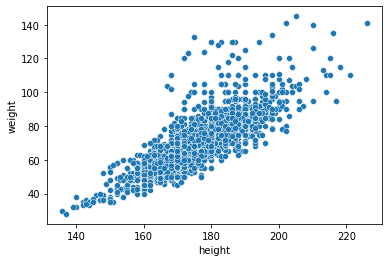

In [ ]:
sns.scatterplot(x=china['height'],y=china['weight'])

<AxesSubplot:xlabel='height', ylabel='weight'>

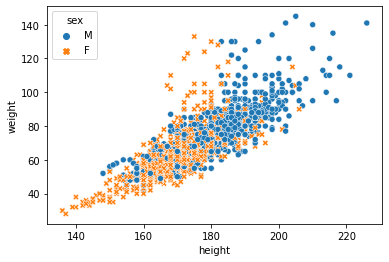

In [ ]:
#sns.scatterplot(data=china, x='height',y='weight', hue='sex')
sns.scatterplot(data=china, x='height',y='weight', hue='sex',style='sex')

In [ ]:
#Analizando valores atípicos
china[(china['sex'] == 'F') & (china['weight']>120)]

#Checando que si son valores atípicos pero no deberíamos eliminarlos

,height,weight,sex,team,sport
name,,,,,
Meng Suping,173.0,123.0,F,China,Weightlifting
Sun Fuming,178.0,124.0,F,China,Judo
Tong Wen,180.0,130.0,F,China,Judo
Yu Song,182.0,128.0,F,China,Judo
Zhou Lulu,175.0,133.0,F,China,Weightlifting


Diferencias de peso y altura de Basquet, voli, Futbol y basebol

In [ ]:
df_sport = df_grouped[df_grouped['sport'].isin(['Basketball','Volleyball', 'Football','Baseball'])]

<AxesSubplot:xlabel='height', ylabel='weight'>

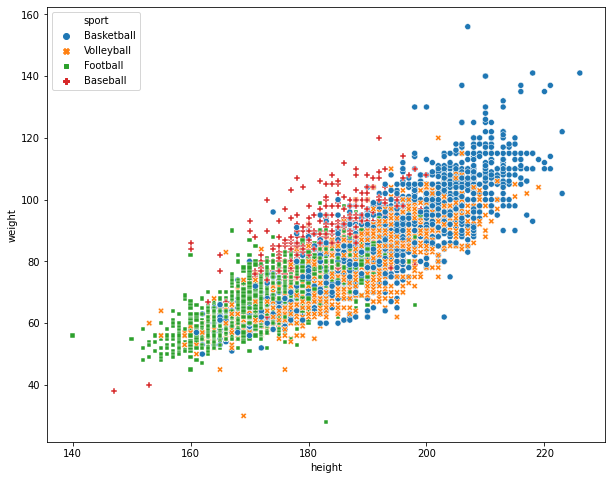

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot()
sns.scatterplot(data=df_sport,x='height',y='weight',hue='sport',style='sport', ax = ax)

Separación de gráficas con Matplotlib:

![Picture title](image-20210917-161359.png)

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='height', ylabel='weight'>

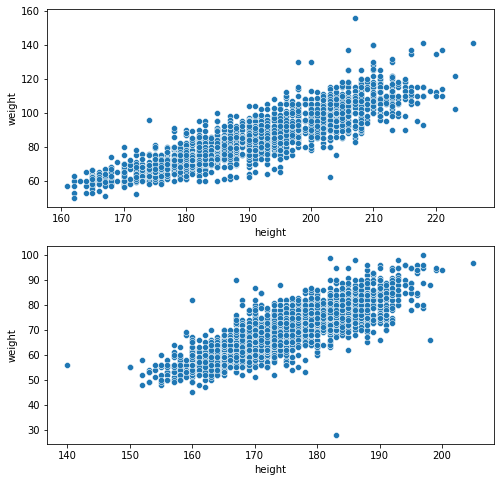

In [ ]:
basket = df_sport[df_sport['sport']=='Basketball']
futbol = df_sport[df_sport['sport']=='Football']

fig = plt.figure(figsize=(8,8))
axes = fig.subplots(2,1,sharex=False,sharey=False)

sns.scatterplot(basket['height'],basket['weight'],ax=axes[0])
sns.scatterplot(futbol['height'],futbol['weight'],ax=axes[1])

Directamente con seaborn:

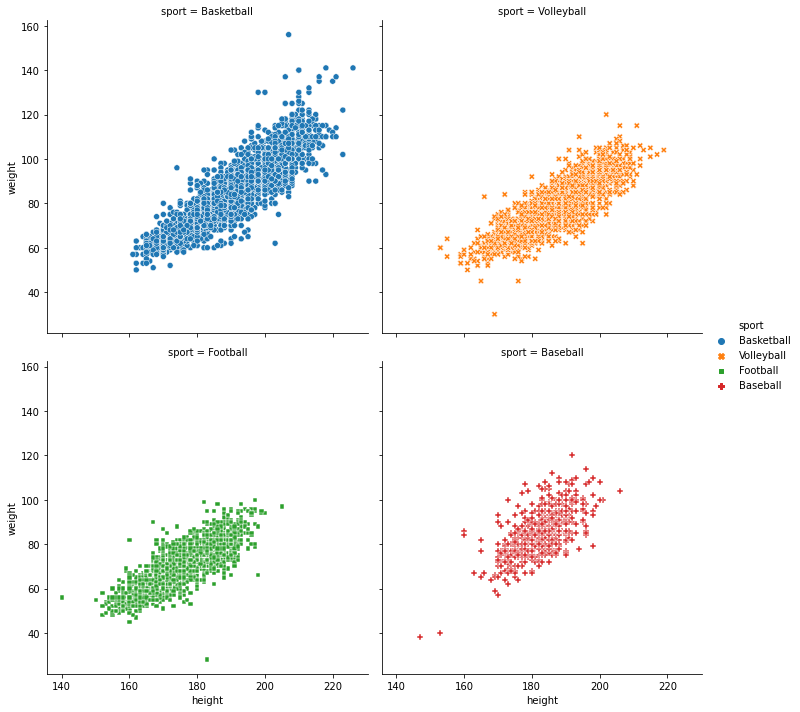

In [ ]:
sns.relplot(data=df_sport,x='height',y='weight',kind='scatter',hue='sport',style='sport',col='sport',col_wrap=2)

In [ ]:
#Sin compartir eje
sns.relplot(data=df_sport,x='height',y='weight',kind='scatter',hue='sport',style='sport',col='sport',col_wrap=2)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f8149d1c-e6b1-497a-9109-f01641a8231a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>